In [1]:
import pandas as pd

df = pd.read_csv('/content/student-por.csv')
df.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [2]:
df = pd.read_csv('/content/student-por.csv', delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
print("Missing values per column:")
print(df.isnull().sum())
print("\nData types of columns:")
print(df.dtypes)
print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data types of columns:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery  

In [4]:
print(f"Shape of DataFrame before removing duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Shape of DataFrame after removing duplicates: {df.shape}")

Shape of DataFrame before removing duplicates: (649, 33)
Shape of DataFrame after removing duplicates: (649, 33)


In [5]:
average_G3 = df['G3'].mean()
print(f"The average final grade (G3) is: {average_G3:.2f}")

The average final grade (G3) is: 11.91


In [6]:
students_above_15 = df[df['G3'] > 15]
num_students_above_15 = len(students_above_15)
print(f"Number of students who scored above 15 in G3: {num_students_above_15}")

Number of students who scored above 15 in G3: 82


In [7]:
correlation = df['studytime'].corr(df['G3'])
print(f"Pearson correlation between Study Time and Final Grade (G3): {correlation:.2f}")

Pearson correlation between Study Time and Final Grade (G3): 0.25


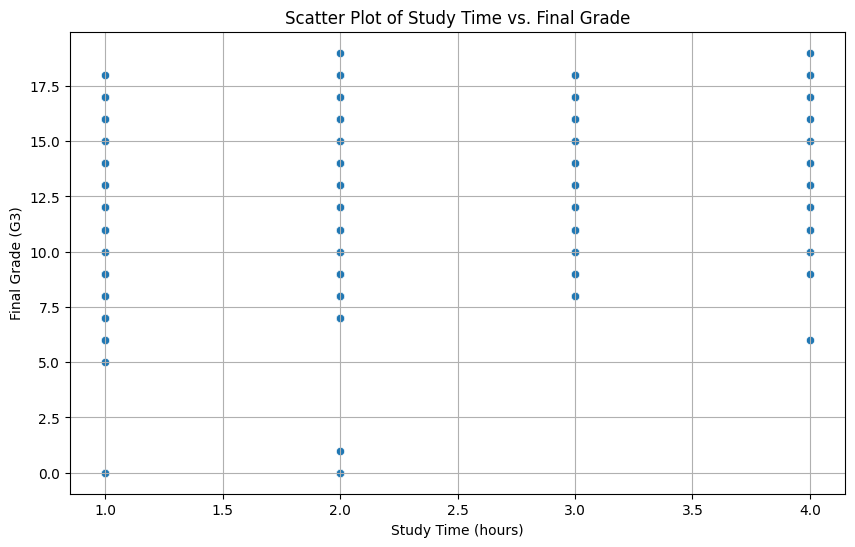

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='studytime', y='G3', data=df)
plt.xlabel('Study Time (hours)')
plt.ylabel('Final Grade (G3)')
plt.title('Scatter Plot of Study Time vs. Final Grade')
plt.grid(True)
plt.show()

In [9]:
avg_g3_by_gender = df.groupby('sex')['G3'].mean()
print("Average G3 by Gender:")
print(avg_g3_by_gender)

Average G3 by Gender:
sex
F    12.253264
M    11.406015
Name: G3, dtype: float64


/tmp/ipython-input-3737681198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_g3_by_gender.index, y=avg_g3_by_gender.values, palette='viridis')


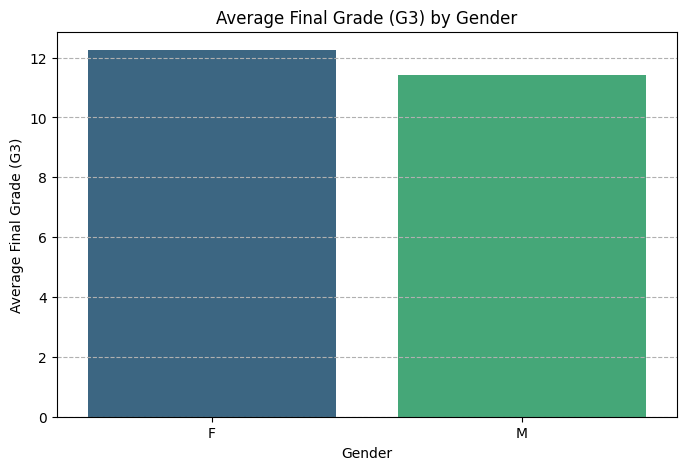

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_g3_by_gender.index, y=avg_g3_by_gender.values, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.title('Average Final Grade (G3) by Gender')
plt.grid(axis='y', linestyle='--')
plt.show()

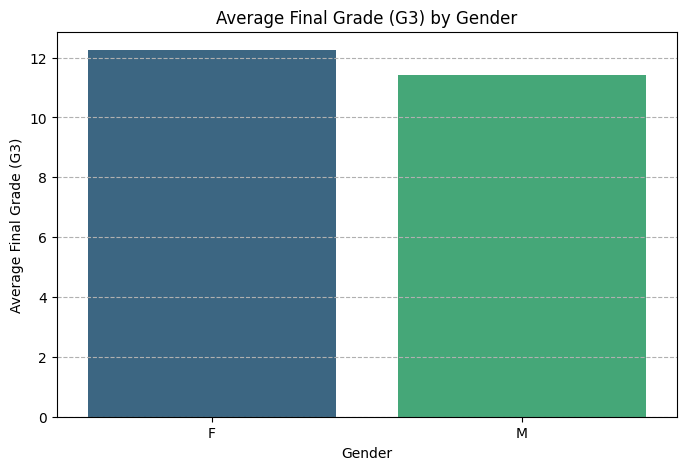

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_g3_by_gender.index, y=avg_g3_by_gender.values, hue=avg_g3_by_gender.index, palette='viridis', legend=False)
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.title('Average Final Grade (G3) by Gender')
plt.grid(axis='y', linestyle='--')
plt.show()

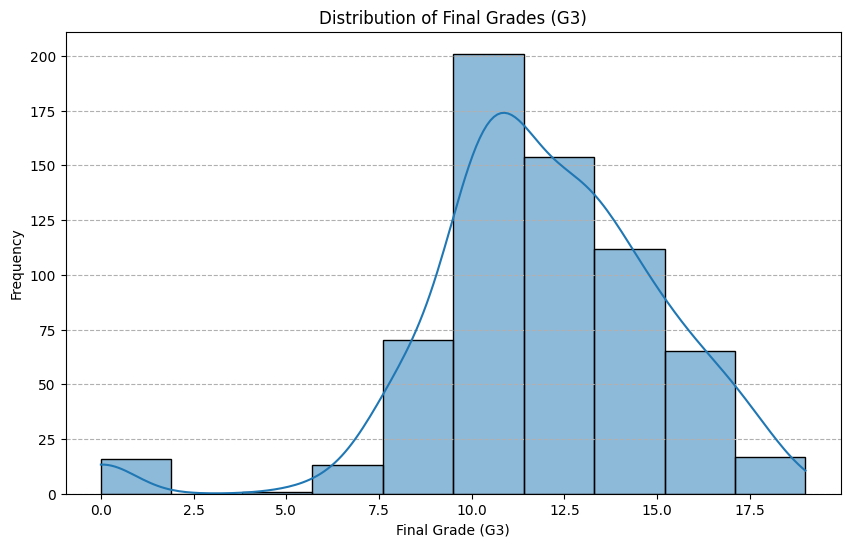

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], bins=10, kde=True)
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.title('Distribution of Final Grades (G3)')
plt.grid(axis='y', linestyle='--')
plt.show()